In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
data=fetch_california_housing()

In [4]:
x=data.data
y=data.target
feature=data.feature_names

In [5]:
df=pd.DataFrame(x,columns=feature)
df['target']=y

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
df.describe().sum()

MedInc        20672.111943
HouseAge      20818.225044
AveRooms      20806.380644
AveBedrms     20679.124972
Population    62560.938866
AveOccup      21906.012463
Latitude      20858.157814
Longitude     19925.473827
target        20654.012764
dtype: float64

In [9]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [10]:
df.shape

(20640, 9)

In [11]:
num_columns=df.select_dtypes(include='number')

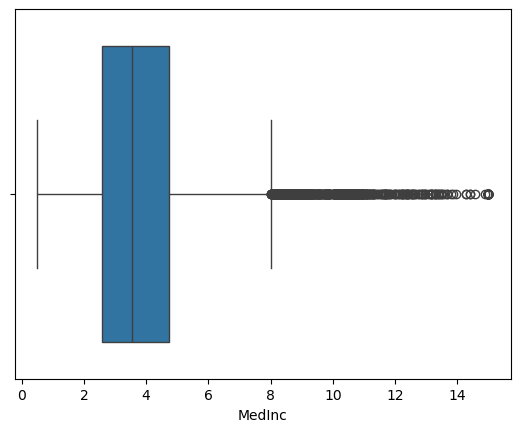

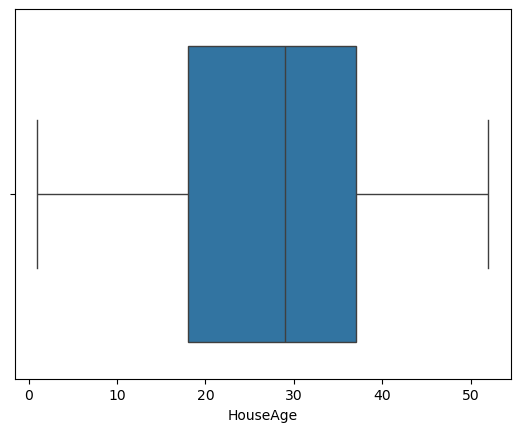

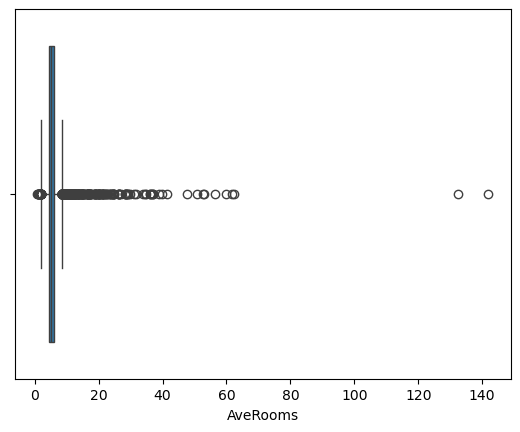

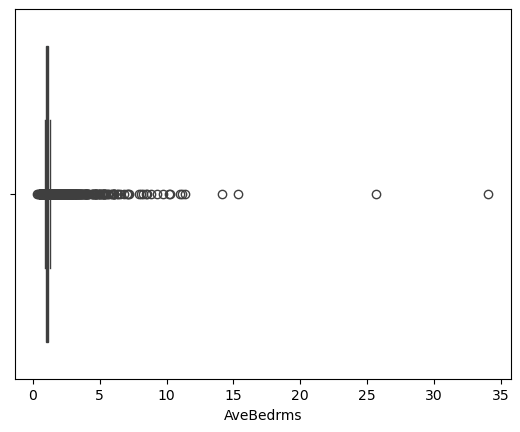

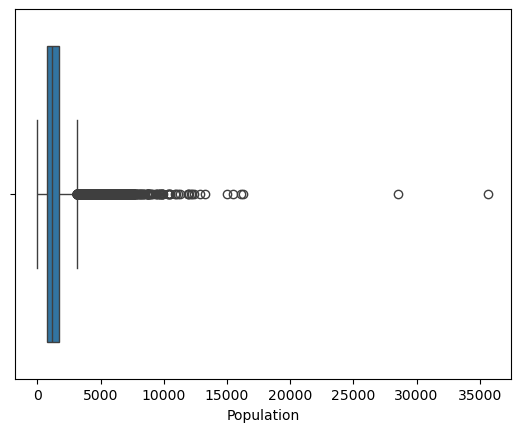

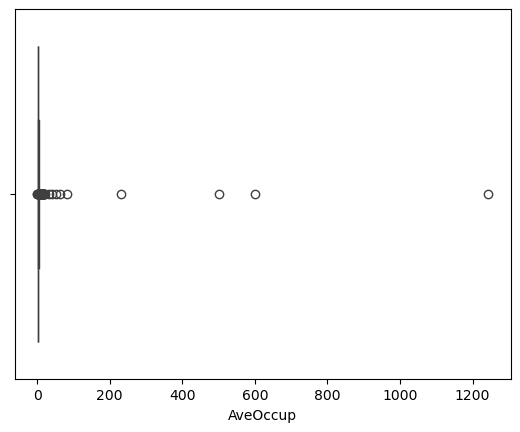

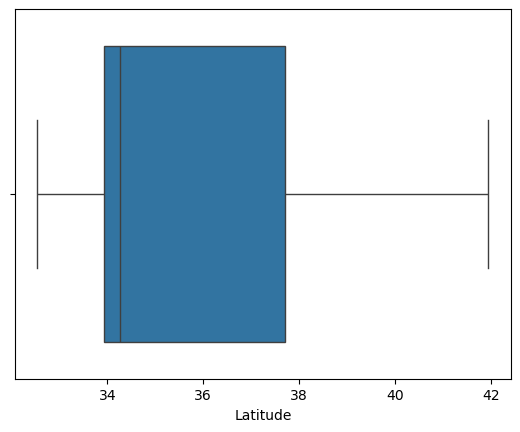

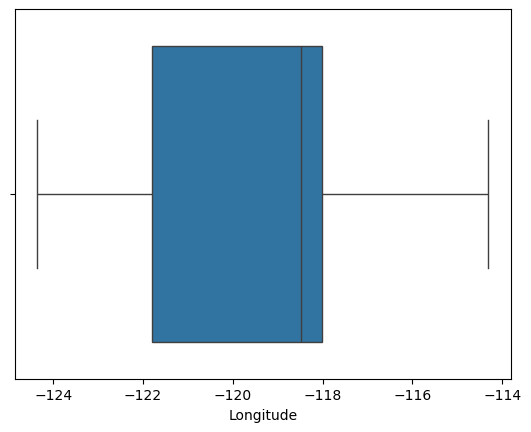

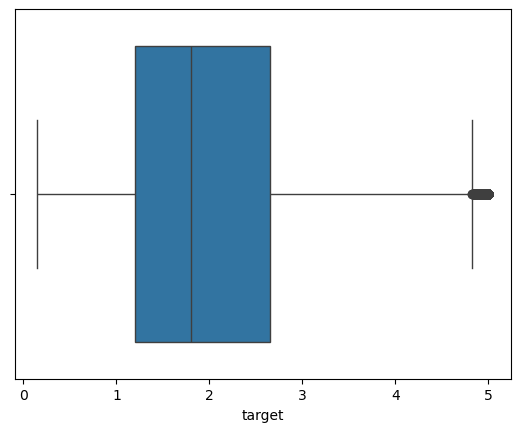

In [12]:
for i in num_columns.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [13]:
# IQR Method
def outliers(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)

        # Capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df

In [14]:
df1=outliers(df)

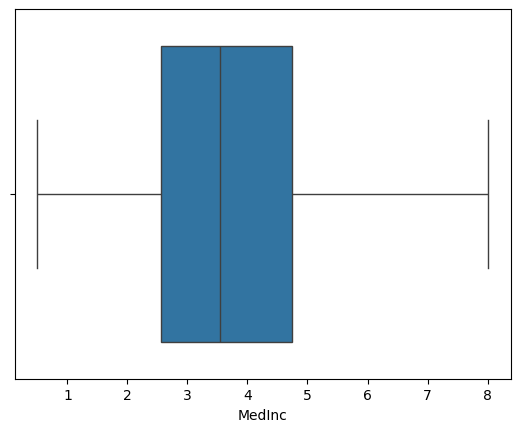

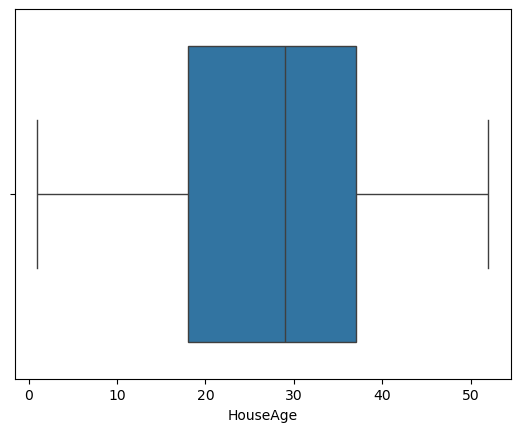

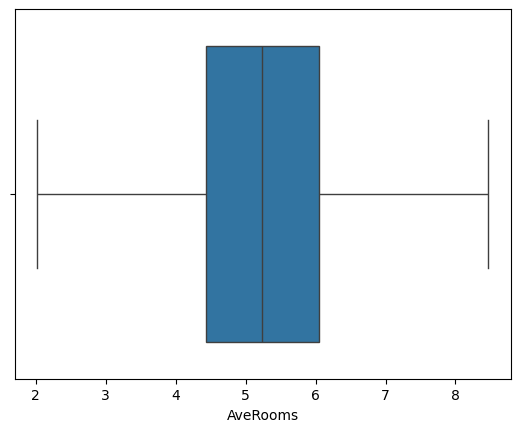

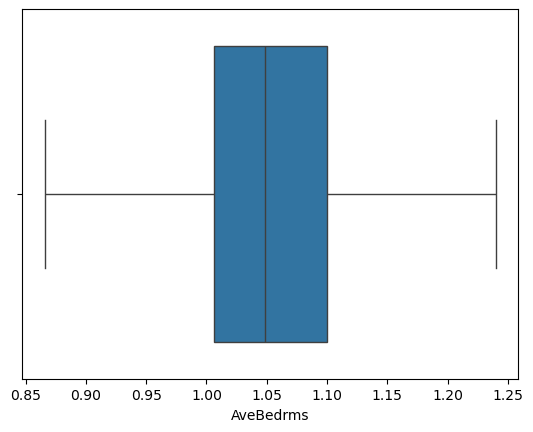

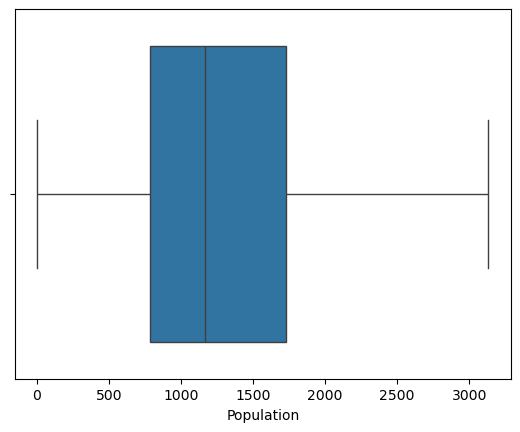

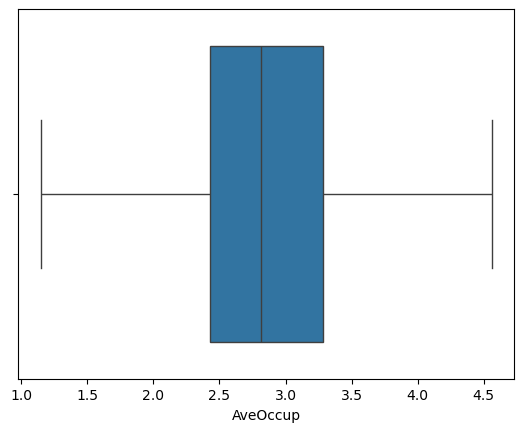

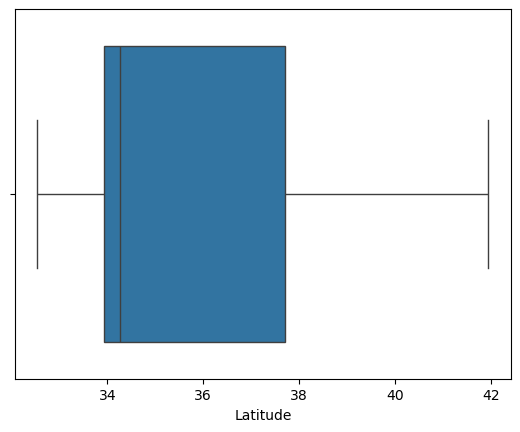

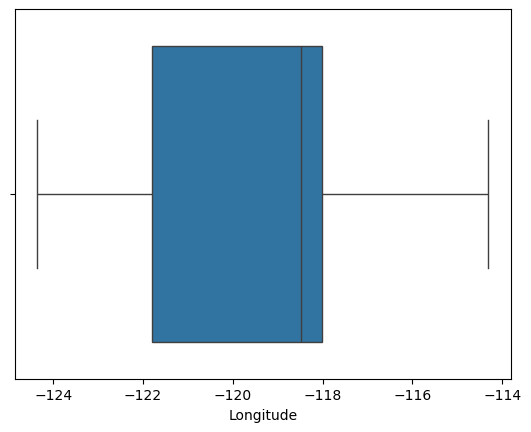

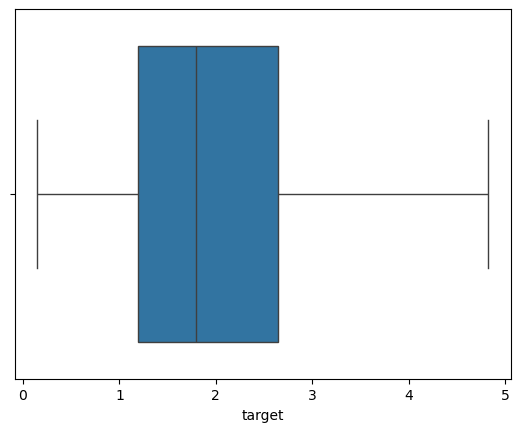

In [15]:
for i in num_columns.columns:
    sns.boxplot(data=df1,x=i)
    plt.show()

In [16]:
df1.skew()

MedInc        0.735618
HouseAge      0.060331
AveRooms      0.348567
AveBedrms     0.462645
Population    0.842247
AveOccup      0.510453
Latitude      0.465953
Longitude    -0.297801
target        0.912330
dtype: float64

In [17]:
from sklearn.preprocessing import PowerTransformer

In [18]:
pt=PowerTransformer(method='yeo-johnson')

In [19]:
numerical_features = df1.select_dtypes(include=['float64', 'int64']).columns

In [20]:
df1[numerical_features] = pt.fit_transform(df1[numerical_features])

In [21]:
df2=df1[numerical_features]

In [22]:
correlation=df2.corr()
correlation

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.149647,0.637936,-0.231318,0.025523,-0.052207,-0.071366,-0.016506,0.682156
HouseAge,-0.149647,1.000000,-0.228693,-0.133337,-0.277908,-0.010820,0.024328,-0.107547,0.077501
AveRooms,0.637936,-0.228693,1.000000,0.155783,-0.101018,0.007493,0.129838,-0.071487,0.263888
AveBedrms,-0.231318,-0.133337,0.155783,1.000000,0.022477,-0.127550,0.047217,0.015406,-0.120227
Population,0.025523,-0.277908,-0.101018,0.022477,1.000000,0.229801,-0.133011,0.115722,0.011856
AveOccup,-0.052207,-0.010820,0.007493,-0.127550,0.229801,1.000000,-0.140537,0.163768,-0.263508
Latitude,-0.071366,0.024328,0.129838,0.047217,-0.133011,-0.140537,1.000000,-0.934695,-0.163582
Longitude,-0.016506,-0.107547,-0.071487,0.015406,0.115722,0.163768,-0.934695,1.000000,-0.030294
target,0.682156,0.077501,0.263888,-0.120227,0.011856,-0.263508,-0.163582,-0.030294,1.000000


Text(0.5, 1.0, 'correlation of California Housing')

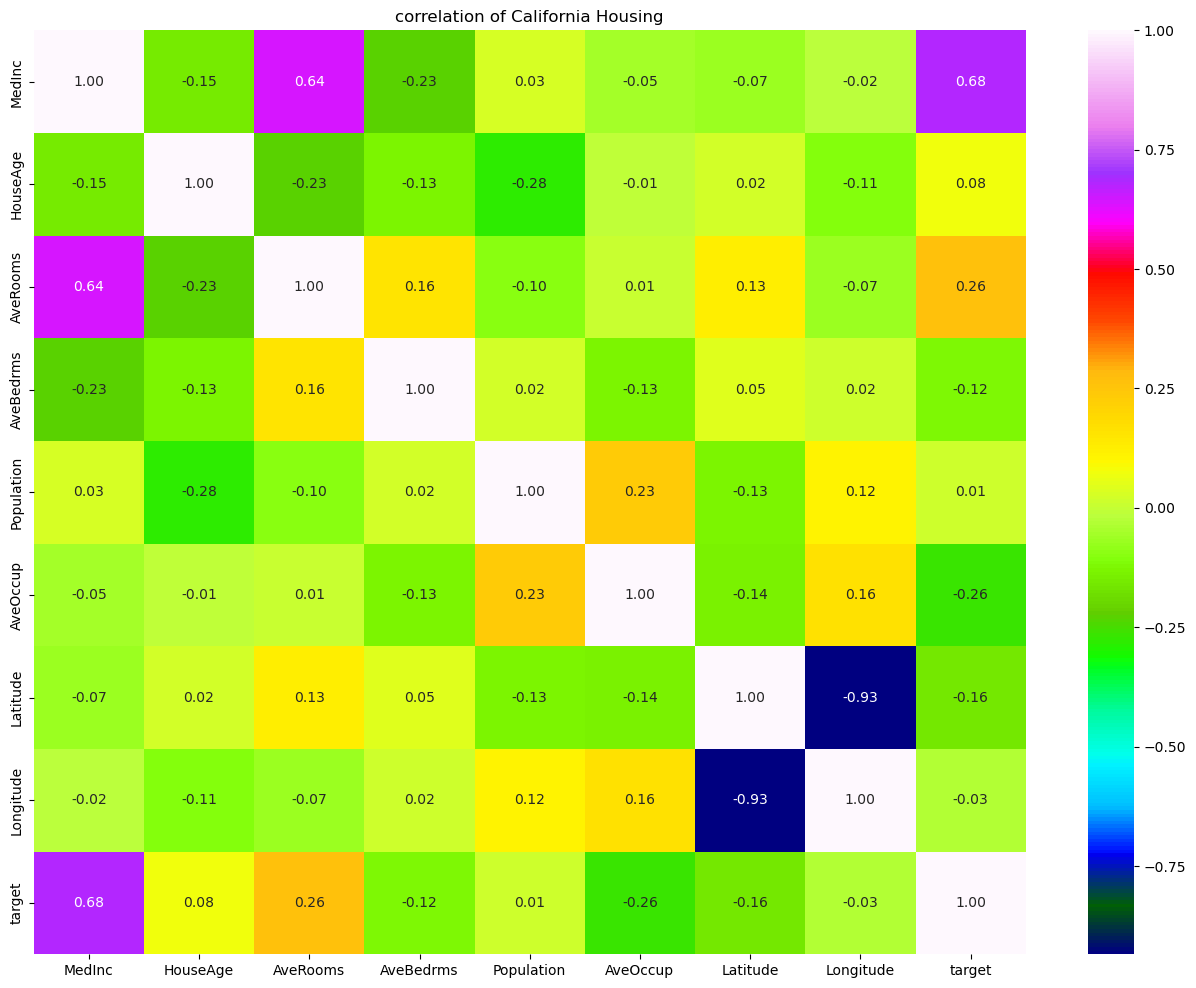

In [23]:
plt.figure(figsize=(16,12))
sns.heatmap(correlation,annot=True,fmt='.2f',cmap='gist_ncar')
plt.title("correlation of California Housing")

In [24]:
df1.skew()

MedInc       -0.002164
HouseAge     -0.113089
AveRooms      0.002958
AveBedrms    -0.003923
Population    0.008781
AveOccup      0.000402
Latitude      0.153850
Longitude     0.000000
target        0.026767
dtype: float64

In [25]:
#feature selection

from sklearn.feature_selection import SelectKBest,r_regression

In [26]:
x=df2.drop('target',axis=1)
y=df['target']

In [27]:
sk=SelectKBest(score_func=r_regression,k=5)
x_new=sk.fit_transform(x,y)

In [28]:
# Get selected feature names and scores
selected_features = x.columns[sk.get_support()]
feature_scores = pd.DataFrame({'Feature': x.columns, 'Score': sk.scores_}).sort_values(by='Score', ascending=False)

print("Selected Features:", selected_features)
print("\nFeature Scores:")
print(feature_scores)

Selected Features: Index(['MedInc', 'HouseAge', 'AveRooms', 'Population', 'Longitude'], dtype='object')

Feature Scores:
      Feature     Score
0      MedInc  0.682156
2    AveRooms  0.263888
1    HouseAge  0.077501
4  Population  0.011856
7   Longitude -0.030294
3   AveBedrms -0.120227
6    Latitude -0.163582
5    AveOccup -0.263508


In [29]:
#standard scaler
from sklearn.preprocessing import StandardScaler

In [30]:
scaler=StandardScaler()

In [31]:
x_scaled=scaler.fit_transform (x)

In [32]:
x_scaled

array([[ 2.03229611,  0.97596837,  1.31235099, ..., -0.43333073,
         1.08903747, -1.30333547],
       [ 2.03229611, -0.56889299,  0.77529503, ..., -1.20373199,
         1.0824037 , -1.30333547],
       [ 1.76888041,  1.7610103 ,  2.18616248, ..., -0.05011249,
         1.07907857, -1.30333547],
       ...,
       [-1.49827866, -0.90585048, -0.02323163, ..., -0.81696541,
         1.54296058, -0.85459043],
       [-1.32710565, -0.82037197,  0.07646286, ..., -1.17895178,
         1.54296058, -0.89946494],
       [-0.84850039, -0.99224544,  0.01644842, ..., -0.33531784,
         1.52740292, -0.8695486 ]])

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [35]:
#regression
from sklearn.linear_model import LinearRegression

In [36]:
model1=LinearRegression()

In [37]:
#fit
model1.fit(x_train,y_train)

LinearRegression()

In [38]:
y_pred1=model1.predict(x_test)

In [39]:
# Model Evaluation MAe,MSE,RMSE,R2Score

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
mae=mean_absolute_error(y_test,y_pred1)
mae

0.43576414687596193

In [42]:
mse=mean_squared_error(y_test,y_pred1)
mse

0.33257276461927243

In [43]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred1))
rmse

0.5766912212087786

In [44]:
r2=r2_score(y_test,y_pred1)
r2

0.6666318011806049

In [45]:
#svr
from sklearn.svm import SVR

In [46]:
model2=SVR()

In [47]:
model2.fit(x_train,y_train)

SVR()

In [48]:
y_pred2=model2.predict(x_test)

In [49]:
mae=mean_absolute_error(y_test,y_pred2)
mse=mean_squared_error(y_test,y_pred2)
rmse=np.sqrt(mean_squared_error(y_test,y_pred2))
r2=r2_score(y_test,y_pred2)


In [50]:
print(f"mae:{mae}")
print(f"mse:{mse}")
print(f"rmse:{rmse}")
print(f"r2:{r2}")

mae:0.33275957684939517
mse:0.20901608532881222
rmse:0.45718277015741987
r2:0.7904839983811794


In [51]:
#RandomForestRegressor,GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [52]:
model3=RandomForestRegressor()

In [53]:
model3.fit(x_train,y_train)

RandomForestRegressor()

In [54]:
y_pred3=model3.predict(x_test)

In [55]:
mae=mean_absolute_error(y_test,y_pred3)
mse=mean_squared_error(y_test,y_pred3)
rmse=np.sqrt(mean_squared_error(y_test,y_pred3))
r2=r2_score(y_test,y_pred3)

In [56]:
print(f"mae:{mae}")
print(f"mse:{mse}")
print(f"rmse:{rmse}")
print(f"r2:{r2}")

mae:0.28747865278307155
mse:0.1727725179784542
rmse:0.41565913676768157
r2:0.8268142516423274


In [57]:
#GradientBoostingRegressor
model4=GradientBoostingRegressor()

In [58]:
model4.fit(x_train,y_train)

GradientBoostingRegressor()

In [59]:
y_pred4=model4.predict(x_test)

In [60]:
mae=mean_absolute_error(y_test,y_pred4)
mse=mean_squared_error(y_test,y_pred4)
rmse=np.sqrt(mean_squared_error(y_test,y_pred4))
r2=r2_score(y_test,y_pred4)

In [61]:
print(f"mae:{mae}")
print(f"mse:{mse}")
print(f"rmse:{rmse}")
print(f"r2:{r2}")

mae:0.33008070263983247
mse:0.2029842153241798
rmse:0.4505376957860239
r2:0.7965302951705724


In [62]:
#DecisionTreeRegressor
#AdaBoostRegressor
#MLPRegressor

In [63]:
#DecisionTreeRegressor

In [64]:
from sklearn.tree import DecisionTreeRegressor

In [65]:
model5=DecisionTreeRegressor()

In [66]:
model5.fit(x_train,y_train)

DecisionTreeRegressor()

In [67]:
y_pred5=model5.predict(x_test)

In [68]:
mae=mean_absolute_error(y_test,y_pred5)
mse=mean_squared_error(y_test,y_pred5)
rmse=np.sqrt(mean_squared_error(y_test,y_pred5))
r2=r2_score(y_test,y_pred5)

In [69]:
print(f"mae:{mae}")
print(f"mse:{mse}")
print(f"rmse:{rmse}")
print(f"r2:{r2}")

mae:0.40001378355349954
mse:0.33989110331204914
rmse:0.5830018038668913
r2:0.6592959587788549


In [70]:
#AdaBoostRegressor

In [71]:
from sklearn.ensemble import AdaBoostRegressor

In [72]:
model6=AdaBoostRegressor()

In [73]:
model6.fit(x_train,y_train)

AdaBoostRegressor()

In [74]:
y_pred6=model6.predict(x_test)

In [75]:
mae=mean_absolute_error(y_test,y_pred6)
mse=mean_squared_error(y_test,y_pred6)
rmse=np.sqrt(mean_squared_error(y_test,y_pred6))
r2=r2_score(y_test,y_pred6)

In [76]:
print(f"mae:{mae}")
print(f"mse:{mse}")
print(f"rmse:{rmse}")
print(f"r2:{r2}")

mae:0.5283251989439826
mse:0.42916382762274247
rmse:0.6551059667128231
r2:0.5698097155465622


In [77]:
#MLPRegressor

In [78]:
from sklearn.neural_network import MLPRegressor

In [79]:
model7=MLPRegressor()

In [80]:
model7.fit(x_train,y_train)

MLPRegressor()

In [81]:
y_pred7=model7.predict(x_test)

In [82]:
mae=mean_absolute_error(y_test,y_pred7)
mse=mean_squared_error(y_test,y_pred7)
rmse=np.sqrt(mean_squared_error(y_test,y_pred7))
r2=r2_score(y_test,y_pred7)

In [83]:
print(f"mae:{mae}")
print(f"mse:{mse}")
print(f"rmse:{rmse}")
print(f"r2:{r2}")

mae:0.3240955027781223
mse:0.1971755683346916
rmse:0.4440445566997659
r2:0.8023528350489662


In [168]:
##

In [172]:
models={
    '1. Linear Regression':LinearRegression(),
    '2. Decision Tree Regressor':DecisionTreeRegressor(),
    '3. Random Forest Regressor':RandomForestRegressor(), 
    '4. Gradiant Boosting Regressor':GradientBoostingRegressor(), 
    '5. Support Vector Regressor':SVR(),
    '6. MLPRegressor':MLPRegressor()
}

In [192]:
# MODEL EVALUATION
results={} # use to store evaluation result 

for model_name, model in models.items():
    # fit the model
    model.fit(x_train,y_train)  
    # make the prediction
    y_pred = model.predict(x_test)
    # Evaluate the model
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    # Store the results
    results[model_name] = {"MSE": mse, "MAE":mae,"RMSE":rmse,"R2": r2,}

In [193]:
result_DF=pd.DataFrame(results).T         # t for transpose
print (result_DF)

                                     MSE       MAE      RMSE        R2
1. Linear Regression            0.332573  0.435764  0.576691  0.666632
2. Decision Tree Regressor      0.344637  0.404433  0.587058  0.654538
3. Random Forest Regressor      0.174072  0.290050  0.417219  0.825512
4. Gradiant Boosting Regressor  0.202963  0.330046  0.450514  0.796552
5. Support Vector Regressor     0.209016  0.332760  0.457183  0.790484
6. MLPRegressor                 0.195573  0.320128  0.442236  0.803960


In [178]:
#Best Model

In [196]:
best_model=max(result_DF['R2'])
best_model

0.8255115974203752

In [198]:
best_model=result_DF.sort_values(by='R2',ascending=False).iloc[0]
print("best_model",best_model)

best_model MSE     0.174072
MAE     0.290050
RMSE    0.417219
R2      0.825512
Name: 3. Random Forest Regressor, dtype: float64


In [200]:
best_model

MSE     0.174072
MAE     0.290050
RMSE    0.417219
R2      0.825512
Name: 3. Random Forest Regressor, dtype: float64

In [212]:
best_model = result_DF.loc[result_DF['R2'].idxmax()]
best_model

MSE     0.174072
MAE     0.290050
RMSE    0.417219
R2      0.825512
Name: 3. Random Forest Regressor, dtype: float64

In [214]:
#joblib
import joblib

In [222]:
joblib.dump(best_model,'sv.joblib')

['sv.joblib']

In [224]:
load_model=joblib.load('sv.joblib')